<a href="https://colab.research.google.com/github/EmmanuelChinkaka/W24-GEOG271-Geographic-Data-Analysis-/blob/main/SAM/HW4/Geospatial%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW4: Influence of spatial distribution of trees on micro (local) heat vulnerability in Philadelphia and relationship on chronic diseases

**Answer all the question and save the notebook in your Github and share with me the link to your Github**

**Abstract**: This project was aimed at assessing the importance of urban tree distribution in addressing effects of a great phenomenon known as Urban Heat Island (UHI). UHI is a kind of heat accumulation phenomenon within urban areas due to urban construction and human activities. These affect most cities including the City of Philadelphia, PA. Therefore, distribution of UHI and how trees contribute to its cooling effect is vital to the well-being of the city residents since this have influence on chronic diseases of residents. This analysis used linear regression, Correlation and Random Forest machine learning techniques to understand the relationship between the spatial distributions of trees in the neighborhood and heating vulnerability. HVI Score and Number pf trees was also be used to predict health factors in Philadelphia such as diabetes and blood pressure.

**Data:** Was collected at the census tract level

**1. Heat Vulnerability by Census Tract**  for 2017-2019 were obtained from **Open Data Philly** through the URL https://www.opendataphilly.org/dataset?q=Heat+Vulnerability+by+Census+Tract

**2. Philadelphia Tree Inventory** for 2021 were obtained from **Open Data Philly** through the URL https://www.opendataphilly.org/dataset/philadelphia-tree-inventory

**3. Health factor variables** were obtained from the CDC 500 Cities dataset: https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq


> Blood_Pressure: Percentage of population with high blood pressure

> Cancer: Percentage of the population with cancer

> Heart_Disease: Percentage of the population with coronary heart disease

> Pulmonary_Disease: Percentage of the population with chronic pulmonary diease

> Diabetes: Percentage of the population with diabetes

> Stroke: Percentage of the population experiencing strokes

> Obesity: Percentage of the population with obesity



**NOTE: Only the choosen chronic disease attributes**


**Install and import packages**

In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [5]:
#Files from the drive
ct_tree = pd.read_csv('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/ct_trees.csv')
heat = pd.read_csv('/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/heat.csv')

**1. Display the first 5 rows of the heat data**

In [6]:
#...

,Unnamed: 0,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh
0,0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458
1,1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750
2,2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750
3,3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359
4,4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631


**2. Display the last 5 rows of the ct_tree data**

In [7]:
ct_tree.tail()

,geoid,num_trees,ave_dbh
370,4.210104e+10,463,16.328294
371,4.210104e+10,310,21.890323
372,4.210198e+10,8177,16.799621
373,4.210198e+10,1033,21.772287
374,4.210198e+10,825,17.225455


In [8]:
#Loading shapfile from the class drive
heat_shape = gpd.GeoDataFrame.from_file("/content/drive/MyDrive/24W GEOG271 Course/Data/Philly data/Heat_Trees_project/heat.shp")

In [41]:
#Creating a column for canopy in the heat_shape data
heat_shape['canopy'] = heat_shape["ave_dbh"] * heat_shape["num_trees"]

**3. Dispaly the shapefile of the heat_shape data**

<Axes: >

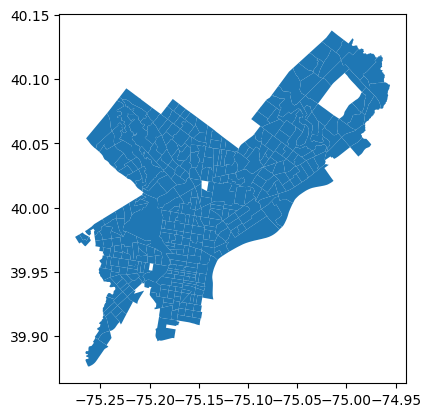

In [11]:
#...

**4. What is the coordinate system of the data heat_shape?**

In [ ]:
#Checking the coordimate system
...

**5. Show the summary stats of the heat_shape variables**

In [20]:
# Summary of the stats of the numerial variables
...

,HVI_SCORE,num_trees,ave_dbh
count,374.000000,374.000000,374.000000
mean,0.013235,388.957219,13.058001
std,1.995821,478.637155,4.618216
min,-6.188905,5.000000,1.476190
25%,-1.365208,190.250000,9.611777
50%,0.121218,297.000000,12.793157
75%,1.415511,463.000000,16.377069
max,5.062507,8177.000000,33.988636


In [32]:
# Accessing specific variables

HVI_score = heat_shape['HVI_SCORE']
HVI_score

0      0.935255
1      2.963969
2      2.676547
3      3.156173
4      2.885302
         ...   
369   -1.626316
370   -0.934188
371   -1.094011
372   -1.194634
373   -3.214504
Name: HVI_SCORE, Length: 374, dtype: float64

**6. Calculate the mean, mode and median of the variable HVI Score**

In [37]:

mean_HVI_SCORE = round(HVI_score.mean(), 4)
print('The mean HVI_score in the data set is ', mean_HVI_SCORE)

mode_HVI_SCORE = round(HVI_score.mode(), 4)
print('The mode HVI_score in the data set is ', mode_HVI_SCORE)

median_HVI_SCORE = round(HVI_score.median(), 4)
print('The median HVI_score in the data set is ', median_HVI_SCORE)

The mean HVI_score in the data set is  0.0132
The mode HVI_score in the data set is  0     -6.1889
1     -4.9303
2     -4.3704
3     -4.2629
4     -4.1455
        ...  
369    4.2117
370    4.3592
371    4.3986
372    4.6943
373    5.0625
Name: HVI_SCORE, Length: 374, dtype: float64
The median HVI_score in the data set is  0.1212


**6. Plotting the histogram of the HVI Score**

<ipython-input-39-37c8bc76d055>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([mean_HVI_SCORE, median_HVI_SCORE], labels = ['Mean', 'Median']);


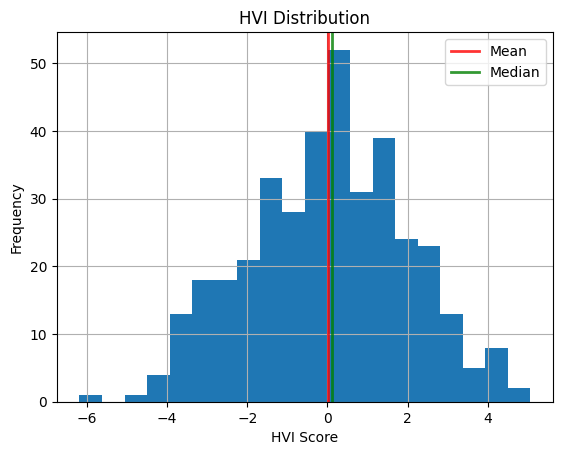

In [39]:
# Histogram

ax = heat_shape['HVI_SCORE'].hist(bins=20)
ax.set_xlabel('HVI Score')
ax.set_ylabel('Frequency')
ax.set_title('HVI Distribution')
ax.axvline(mean_HVI_SCORE, color='red', linestyle='solid', linewidth=2, alpha= .8)
ax.axvline(median_HVI_SCORE, color='green', linestyle='solid', linewidth=2, alpha= .8)
ax.legend([mean_HVI_SCORE, median_HVI_SCORE], labels = ['Mean', 'Median']);

**7. Describe the distribution of the data in variable HVI Score based on the histogram above.**

**8. Is there an outline in the data. If yes, how does an outlier affect the data distribution. How can an outlier be resloved?**

[]

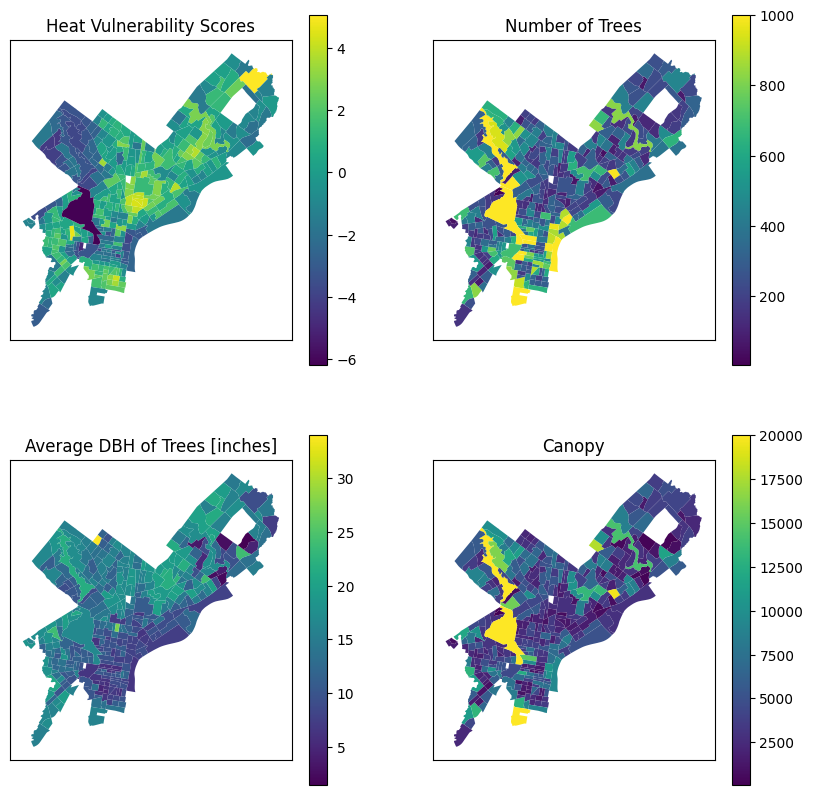

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
heat_shape.plot('HVI_SCORE', ax=ax[0,0], legend=True)
ax[0,0].set_title("Heat Vulnerability Scores")
heat_shape.plot('num_trees', ax=ax[0,1], legend=True, vmax=1000)
ax[0,1].set_title("Number of Trees")
heat_shape.plot('ave_dbh', ax=ax[1,0], legend=True)
ax[1,0].set_title("Average DBH of Trees [inches]")
heat_shape.plot('canopy', ax=ax[1,1], legend=True, vmax=20000)
ax[1,1].set_title("Canopy")


ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])

**9. Explain the relationship between Heat Vulnerability Score and the spatial distribution of trees based on the figure above.**

**10. Discuss the impact of the canopy in relation to the local microclimatic conditions in the study area**

**End of Modelling and Analysis**